# Отток клиентов

## Подготовка данных

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
#df.head()

In [ ]:
#df['geography'].value_counts()

In [ ]:
#df[df['tenure'].isnull()]

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Выделим нужные столбы с типом данных "object", соберем их в переменную и преобразуем данные прямым кодированием. Не обрабатываю кодированием весь датафрейм, чтобы не плодить много лишних столбцов с фамилиями клиентов

In [ ]:
test = df[['rownumber', 'geography', 'gender']]

In [ ]:
test = pd.get_dummies(test, drop_first=True)

Присоеденим переменную с преобразованными столбцами к датафрейму

In [ ]:
df = df.merge(test, on='rownumber', how='outer')

In [ ]:
df['tenure'] = df['tenure'].fillna(df['tenure'].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 17 columns):
rownumber            10000 non-null int64
customerid           10000 non-null int64
surname              10000 non-null object
creditscore          10000 non-null int64
geography            10000 non-null object
gender               10000 non-null object
age                  10000 non-null int64
tenure               10000 non-null float64
balance              10000 non-null float64
numofproducts        10000 non-null int64
hascrcard            10000 non-null int64
isactivemember       10000 non-null int64
estimatedsalary      10000 non-null float64
exited               10000 non-null int64
geography_Germany    10000 non-null uint8
geography_Spain      10000 non-null uint8
gender_Male          10000 non-null uint8
dtypes: float64(3), int64(8), object(3), uint8(3)
memory usage: 1.2+ MB


Посмотрим корреляцию признаков датафрейма

In [ ]:
df.corr()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
rownumber,1.000000,0.004202,0.005840,0.000783,-0.006979,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571,-0.000044,-0.009905,0.018196
customerid,0.004202,1.000000,0.005308,0.009497,-0.020331,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248,-0.003097,0.007800,-0.002641
creditscore,0.005840,0.005308,1.000000,-0.003965,-0.000060,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
age,0.000783,0.009497,-0.003965,1.000000,-0.012606,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
tenure,-0.006979,-0.020331,-0.000060,-0.012606,1.000000,-0.007535,0.011409,0.025979,-0.030681,0.010049,-0.015989,-0.003153,0.000772,0.012041
balance,-0.009067,-0.012419,0.006268,0.028308,-0.007535,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
numofproducts,0.007246,0.016972,0.012238,-0.030680,0.011409,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
hascrcard,0.000599,-0.014025,-0.005458,-0.011721,0.025979,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
isactivemember,0.012044,0.001665,0.025651,0.085472,-0.030681,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
estimatedsalary,-0.005988,0.015271,-0.001384,-0.007201,0.010049,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112


Данные практически не коррелируют между собой

Построим гистаграммы прищзнаков, для которых describe показал большой разброс 

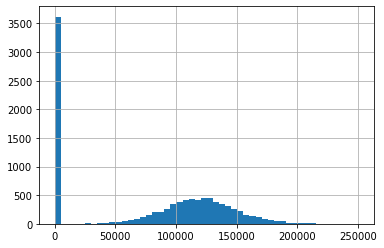

In [ ]:
df['balance'].hist(bins=50)
plt.show()

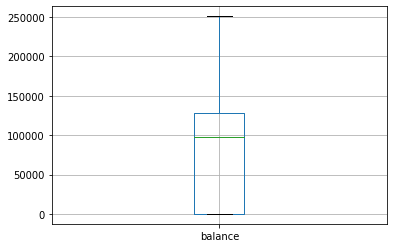

In [ ]:
df.boxplot(column = 'balance')
plt.show()

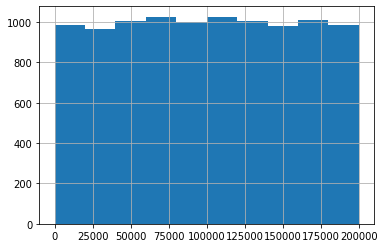

In [ ]:
df['estimatedsalary'].hist()
plt.show()

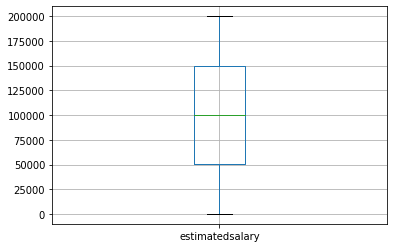

In [ ]:
df.boxplot(column = 'estimatedsalary')
plt.show()

Данные распределены нормально

In [ ]:
df

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


### Вывод

Подгружены нужные библиотеки. Скачан датасет, заглавные буквы заменены на строчные. Данные изучены,выявлено много пропусков в столбце "tenure", удалять их - значит потерять 10% датафрейма, поэтому заменил их медианным значением. Дубликатов нет, выбросов тоже. Созданы новые столбцы на основании столбцов со строковыми данными, потому что модель не будет работать с объектами.

## Исследование задачи

Разделим датафрейм на 3 выборки, в соотношении 60/20/20

In [ ]:
target = df['exited']
features = df.drop(['exited', 'geography', 'gender', 'surname', 'rownumber', 'customerid'], axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)

In [ ]:
target = df['exited']
features = df.drop(['exited', 'geography', 'gender', 'surname', 'rownumber', 'customerid'], axis=1)
features_test, features_valid, target_test, target_valid = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345, stratify=target_valid)

In [ ]:
features_train.shape, features_valid.shape, features_test.shape

((6000, 11), (2000, 11), (2000, 11))

Обучим модель решающего дерева на датафрейме с несбалансированными классами

In [ ]:
model_des_tree = DecisionTreeClassifier(random_state=12345)
model_des_tree.fit(features_train, target_train)
predicted_valid_des_tree = model_des_tree.predict(features_valid)

In [ ]:
accuracy_valid = accuracy_score(target_valid, predicted_valid_des_tree)
print(accuracy_valid)

0.787


In [ ]:
target_pred_constant = pd.Series(target * 0)

In [ ]:
accuracy_score(target, target_pred_constant)

0.7963

In [ ]:
df['exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

In [ ]:
f1_score(target_valid, predicted_valid_des_tree)

0.4879807692307693

Посмотрим матрицу ошибок. Как оказалось данные очень несбалансированы

In [ ]:
confusion_matrix(target_valid, predicted_valid_des_tree)

array([[1371,  222],
       [ 204,  203]])

Accuracy предсказаний при несбалансированных классах меньше, чем accuracy константной модели. Метрика F1 очень мала. Попробуем модель случайного леса.

In [ ]:
best_result_ran_forest = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_ran_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, min_samples_split=2)
        model_ran_forest.fit(features_train, target_train)
        predictions_valid_ran_forest = model_ran_forest.predict(features_valid)
        result_ran_forest = f1_score(target_valid, predictions_valid_ran_forest)
        if result_ran_forest > best_result_ran_forest:
            best_result_ran_forest = result_ran_forest
            best_est = est
            best_depth = depth

print("F1 лучшей модели случайного леса:", best_result_ran_forest, "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

F1 лучшей модели случайного леса: 0.5417322834645668 Количество деревьев: 40 Максимальная глубина: 10


In [ ]:
probabilities_valid_ran_forest = model_ran_forest.predict_proba(features_valid)
probabilities_one_valid_ran_forest = probabilities_valid_ran_forest[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_ran_forest)

(0.0, 1.0)

<Figure size 432x288 with 0 Axes>

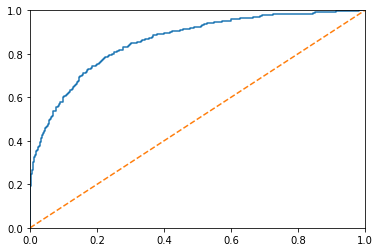

In [ ]:
plt.figure()

plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

In [ ]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid_ran_forest)
auc_roc

0.8586768586768586

Посмотрим матрицу ошибок. Как оказалось данные очень несбалансированы, но ошибок уже меньше

In [ ]:
confusion_matrix(target_valid, predictions_valid_ran_forest)

array([[1538,   55],
       [ 237,  170]])

Модель случайного леса показывает лучшие результаты метрики F1, но этого все-равно недостаточно. Значение метрики Auc_roc тоже далеко от идеала

На очереди модель логистической регрессии


In [ ]:
model_log_reg = LogisticRegression(solver='liblinear', random_state=12345)
model_log_reg.fit(features_train, target_train)
predicted_valid_log_reg = model_log_reg.predict(features_valid)

In [ ]:
f1_score(target_valid, predicted_valid_log_reg)

0.06208425720620843

Модель логистической регрессии показывает очень странное значение

Посмотрим матрицу ошибок. Ошибок второго рода стало гораздо больше, а FP и TP  ответы совсем пропали

In [ ]:
confusion_matrix(target_valid, predicted_valid_log_reg)

array([[1563,   30],
       [ 393,   14]])

### Вывод

Все модели показывают плохие значения при несбалансированных классах. Значение метрики auc-roc для лучшей из моделей достаточно высоко

## Борьба с дисбалансом

Попробуем сбалансировать классы

In [ ]:
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

In [ ]:
f1_score(target_valid, predictions_valid)

0.4681933842239186

Балансировка классов не дала нужного результата, поэтому попробуем увеличить долю положительных ответов в тренировочной выборке

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [ ]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [ ]:
best_result_des_tree = 0
for depth in range(1, 6):
    model_upsample_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_split=2)
    model_upsample_dt.fit(features_upsampled, target_upsampled)
    predictions_valid_upsample_dt = model_upsample_dt.predict(features_valid)
    result_des_tree = f1_score(target_valid, predictions_valid_upsample_dt)
    if result_des_tree > best_result_des_tree:
        best_result_des_tree = result_des_tree
        best_depth = depth
        
print("f1 лучшей модели случайного леса:", best_result_des_tree, "Глубина дерева:", best_depth)

f1 лучшей модели случайного леса: 0.5403949730700179 Глубина дерева: 4


In [ ]:
model_upsample_dt = DecisionTreeClassifier(random_state=12345)
model_upsample_dt.fit(features_upsampled, target_upsampled)
predicted_valid_upsample_dt = model_upsample_dt.predict(features_valid)

In [ ]:
f1_score(target_valid, predicted_valid_upsample_dt)

0.48284625158831

Модель дерева решений плохо предсказывает даже при сбалансированных классах. Попробуем модель логистической регрессии со сбалансированной тренировочной выборкой

In [ ]:
model_upsample_lg = LogisticRegression(solver='liblinear', random_state=12345)
model_upsample_lg.fit(features_upsampled, target_upsampled)
predicted_valid_upsample_lg = model_upsample_lg.predict(features_valid)

In [ ]:
f1_score(target_valid, predicted_valid_upsample_lg)

0.4447974583002383

На очереди модель случайного леса:

In [ ]:
best_result_ran_forest = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_upsample_ran_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_upsample_ran_forest.fit(features_upsampled, target_upsampled)
        predictions_valid_ran_forest = model_upsample_ran_forest.predict(features_valid)
        result_ran_forest = f1_score(target_valid, predictions_valid_ran_forest)
        if result_ran_forest > best_result_ran_forest:
            best_result_ran_forest = result_ran_forest
            best_est = est
            best_depth = depth

print("f1 лучшей модели случайного леса:", best_result_ran_forest, "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)

f1 лучшей модели случайного леса: 0.6152173913043478 Количество деревьев: 40 Максимальная глубина: 9


Посмотрим матрицу ошибок. Ошибок стало больше по сравнению с моделью случайного леса несбалансированных классов, но значение метрики f1 улучшилось

In [ ]:
confusion_matrix(target_valid, predictions_valid_ran_forest)

array([[1362,  231],
       [ 129,  278]])

Получили значение F1 выше требуемых 0.59. Попробуем модель на тестовой выборке

### Вывод

Обучили модель, нашли лучшую, улучшили ее изменением гиперпараметров

## Тестирование модели

In [ ]:
predictions_test = model_upsample_ran_forest.predict(features_test)

In [ ]:
f1_score(target_test, predictions_test)

0.6435536294691224

In [ ]:
probabilities_valid = model_upsample_ran_forest.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_valid)

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid)

(0.0, 1.0)

<Figure size 432x288 with 0 Axes>

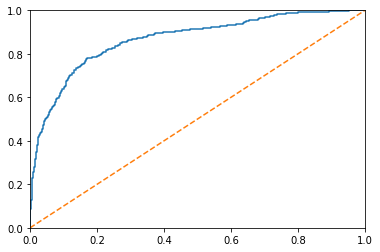

In [ ]:
plt.figure()

plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

In [ ]:
auc_roc

0.8669065302000197

In [ ]:
confusion_matrix(target_test, predictions_test)

array([[1374,  218],
       [ 111,  297]])

### Вывод

Получили значение F1 равное 0.61 и значение auc-roc равное 0.97. Задание выполнено, даже без изменения порогов